In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


C:\Users\pa389\AppData\Local\Temp\ipykernel_20176\1325467767.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data,columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
dff = df.drop(['sepal length (cm)','sepal width (cm)'],axis = 'columns')

In [7]:
km = KMeans(n_clusters = 2)
km

KMeans(n_clusters=2)

In [8]:
dff['cluster'] = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
dff

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


TypeError: 'str' object is not callable

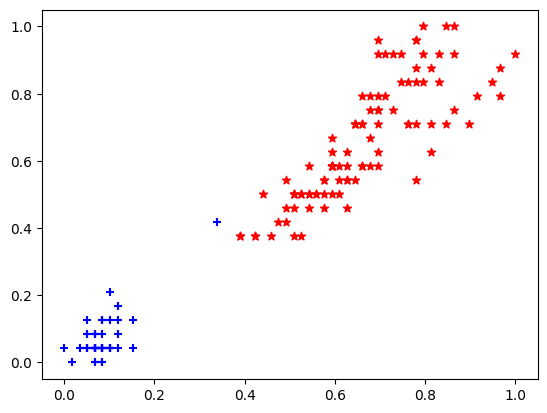

In [22]:
df1 = dff[dff.cluster == 0]
df2 = dff[dff.cluster == 1]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = "red",marker = '*',label = 'Petal')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = "blue",marker = '+',label = 'Petal')
plt.axis("off")
plt.xlabel('Petal Length')
plt.ylabel('petal width')
plt.legend()

# Preprocessing


In [10]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler()

In [11]:
sc.fit(dff[['petal length (cm)']])
dff[['petal length (cm)']] = sc.transform(dff[['petal length (cm)']])
dff

,petal length (cm),petal width (cm),cluster
0,0.067797,0.2,1
1,0.067797,0.2,1
2,0.050847,0.2,1
3,0.084746,0.2,1
4,0.067797,0.2,1
...,...,...,...
145,0.711864,2.3,0
146,0.677966,1.9,0
147,0.711864,2.0,0
148,0.745763,2.3,0


In [12]:
sc.fit(dff[['petal width (cm)']])
dff[['petal width (cm)']] = sc.transform(dff[['petal width (cm)']])
dff

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [13]:
km1 = KMeans(n_clusters = 2 )
km1

KMeans(n_clusters=2)

In [14]:
y_pre = km1.fit_predict(dff[['petal length (cm)','petal width (cm)']])
dff['clusters'] = y_pre
#dff = dff.drop(['cluster'],axis = 'columns')


In [15]:
dff

,petal length (cm),petal width (cm),cluster,clusters
0,0.067797,0.041667,1,0
1,0.067797,0.041667,1,0
2,0.050847,0.041667,1,0
3,0.084746,0.041667,1,0
4,0.067797,0.041667,1,0
...,...,...,...,...
145,0.711864,0.916667,0,1
146,0.677966,0.750000,0,1
147,0.711864,0.791667,0,1
148,0.745763,0.916667,0,1


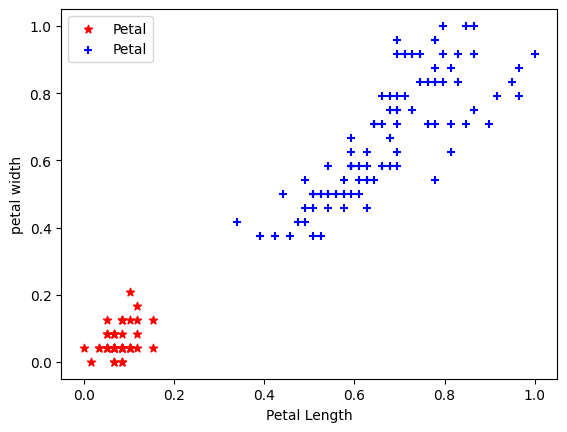

In [16]:
df1 = dff[dff.clusters == 0]
df2 = dff[dff.clusters == 1]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = "red",marker = '*',label = 'Petal')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = "blue",marker = '+',label = 'Petal')

plt.xlabel('Petal Length')
plt.ylabel('petal width')
plt.legend()

# centroid

In [17]:
km1.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.6620339 , 0.65666667]])

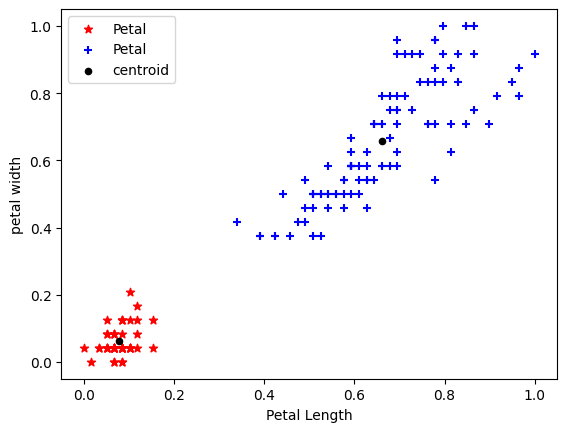

In [18]:
df1 = dff[dff.clusters == 0]
df2 = dff[dff.clusters == 1]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = "red",marker = '*',label = 'Petal')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = "blue",marker = '+',label = 'Petal')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color = 'black',marker = '.',s = 80,label = 'centroid')
plt.xlabel('Petal Length')
plt.ylabel('petal width')
plt.legend()

# Elbow Method

In [19]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km2 = KMeans(n_clusters = k)
    km2.fit(dff[['petal length (cm)','petal width (cm)']])
    sse.append(km2.inertia_)

In [20]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1682845817022387,
 0.8535683225340072,
 0.6836000429696288,
 0.565127345570398,
 0.49774063859426165,
 0.4366030461145207]

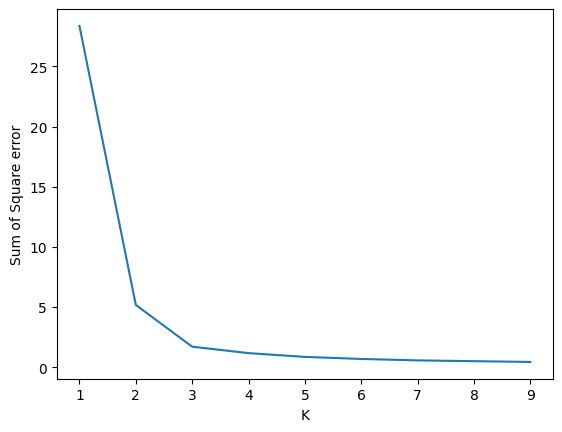

In [21]:
plt.xlabel("K")
plt.ylabel("Sum of Square error")
plt.plot(k_rng,sse)